In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [2]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
#import jovian
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split


%matplotlib inline

In [3]:
# load dataset

df = pd.read_csv('wine.csv')

In [4]:
df

index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0         0            7.4              0.70         0.00             1.9   
1         1            7.8              0.88         0.00             2.6   
2         2            7.8              0.76         0.04             2.3   
3         3           11.2              0.28         0.56             1.9   
4         4            7.4              0.70         0.00             1.9   
...     ...            ...               ...          ...             ...   
6492   4893            6.2              0.21         0.29             1.6   
6493   4894            6.6              0.32         0.36             8.0   
6494   4895            6.5              0.24         0.19             1.2   
6495   4896            5.5              0.29         0.30             1.1   
6496   4897            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
6492      0.039                 24.0                  92.0  0.99114  3.27   
6493      0.047                 57.0                 168.0  0.99490  3.15   
6494      0.041                 30.0                 111.0  0.99254  2.99   
6495      0.022                 20.0                 110.0  0.98869  3.34   
6496      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol  quality  
0          0.56      9.4        5  
1          0.68      9.8        5  
2          0.65      9.8        5  
3          0.58      9.8        6  
4          0.56      9.4        5  
...         ...      ...      ...  
6492       0.50     11.2        6  
6493       0.46      9.6        5  
6494       0.46      9.4        6  
6495       0.38     12.8        7  
6496       0.32     11.8        6  

[6497 rows x 13 columns]

In [5]:
'''
We will be analyzing the dataset by using Linear Regression with the pytorch module
Simple linear regression is an approach for predicting a response using a single 
feature. It is assumed that the two variables are linearly related.
'''


'\nWe will be analyzing the dataset by using Linear Regression with the pytorch module\nSimple linear regression is an approach for predicting a response using a single \nfeature. It is assumed that the two variables are linearly related.\n'

In [6]:
input_cols = list(df[['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']])
output_cols = ['quality']
input_cols, output_cols

# X = df.iloc[:,:-1].values # features
# Y = df.iloc[:,-1].values # dependent variable
# X, Y

(['volatile acidity',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'alcohol'],
 ['quality'])

In [7]:
def df_to_arrays(df):
    df1 = df.copy(deep=True)
    inputs_array = df1[input_cols].to_numpy()
    targets_array = df1[output_cols].to_numpy()
    return inputs_array, targets_array

In [8]:
inputs_array, targets_array = df_to_arrays(df)
inputs_array, targets_array

(array([[7.00e-01, 7.60e-02, 1.10e+01, 3.40e+01, 9.40e+00],
        [8.80e-01, 9.80e-02, 2.50e+01, 6.70e+01, 9.80e+00],
        [7.60e-01, 9.20e-02, 1.50e+01, 5.40e+01, 9.80e+00],
        ...,
        [2.40e-01, 4.10e-02, 3.00e+01, 1.11e+02, 9.40e+00],
        [2.90e-01, 2.20e-02, 2.00e+01, 1.10e+02, 1.28e+01],
        [2.10e-01, 2.00e-02, 2.20e+01, 9.80e+01, 1.18e+01]]),
 array([[5],
        [5],
        [5],
        ...,
        [6],
        [7],
        [6]], dtype=int64))

In [9]:
inputs = torch.from_numpy(inputs_array).type(torch.float)
targets = torch.from_numpy(targets_array).type(torch.float)
inputs, targets

(tensor([[7.0000e-01, 7.6000e-02, 1.1000e+01, 3.4000e+01, 9.4000e+00],
         [8.8000e-01, 9.8000e-02, 2.5000e+01, 6.7000e+01, 9.8000e+00],
         [7.6000e-01, 9.2000e-02, 1.5000e+01, 5.4000e+01, 9.8000e+00],
         ...,
         [2.4000e-01, 4.1000e-02, 3.0000e+01, 1.1100e+02, 9.4000e+00],
         [2.9000e-01, 2.2000e-02, 2.0000e+01, 1.1000e+02, 1.2800e+01],
         [2.1000e-01, 2.0000e-02, 2.2000e+01, 9.8000e+01, 1.1800e+01]]),
 tensor([[5.],
         [5.],
         [5.],
         ...,
         [6.],
         [7.],
         [6.]]))

In [10]:
print('Shape of input tensor and target tensor::  ',inputs.shape, targets.shape)
print('datatype of input tensor and target tensor::  ',inputs.dtype, targets.dtype)

Shape of input tensor and target tensor::   torch.Size([6497, 5]) torch.Size([6497, 1])
datatype of input tensor and target tensor::   torch.float32 torch.float32


In [11]:
dataset = TensorDataset(inputs, targets)
dataset

In [12]:
train_ds, val_ds = random_split(dataset, [5200, 1297])
batch_size = 200
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [13]:
for xb, yb in train_loader:
    print('inputs:', xb)
    print('targets:', yb)
    break

inputs: tensor([[2.8000e-01, 3.3000e-02, 3.1000e+01, 1.7700e+02, 1.1200e+01],
        [2.3000e-01, 4.2000e-02, 3.7000e+01, 1.4400e+02, 1.0200e+01],
        [2.1000e-01, 4.5000e-02, 6.8000e+01, 1.8300e+02, 9.4000e+00],
        [2.0000e-01, 3.4000e-02, 3.7000e+01, 1.0400e+02, 1.2700e+01],
        [2.1000e-01, 3.9000e-02, 2.1000e+01, 1.2300e+02, 9.5000e+00],
        [6.1000e-01, 6.9000e-02, 4.0000e+00, 8.0000e+00, 1.0400e+01],
        [5.4000e-01, 1.1100e-01, 7.0000e+00, 6.0000e+01, 1.0200e+01],
        [3.4000e-01, 4.6000e-02, 2.9000e+01, 1.3400e+02, 1.0700e+01],
        [3.2000e-01, 5.6000e-02, 9.0000e+00, 2.4000e+01, 1.0300e+01],
        [3.0000e-01, 3.4000e-02, 1.7000e+01, 1.2100e+02, 9.2000e+00],
        [1.8500e-01, 4.8000e-02, 3.6000e+01, 1.1000e+02, 9.5000e+00],
        [3.2000e-01, 3.0000e-02, 3.1000e+01, 1.2700e+02, 1.2800e+01],
        [1.6000e-01, 5.9000e-02, 3.1000e+01, 1.3100e+02, 9.7000e+00],
        [2.3000e-01, 4.3000e-02, 3.1000e+01, 1.0100e+02, 1.0400e+01],
        [3.5

In [14]:
print(xb.dtype, yb.dtype)

torch.float32 torch.float32


In [15]:
input_size = len(input_cols)
output_size = len(output_cols)
input_size, output_size

(5, 1)

In [16]:
class WineQuality(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)
        return {'val_loss': loss.detach()}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        if (epoch+1) % 100 == 0 or epoch == num_epochs-1:
            print('Epoch [{}], val_loss: {:.4f}'.format(epoch+1, result['val_loss']))

In [17]:
model = WineQuality()

In [18]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [24]:
epochs = 6000
lr = 2e-6
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 1.1529
Epoch [200], val_loss: 0.9724
Epoch [300], val_loss: 0.8603
Epoch [400], val_loss: 0.7960
Epoch [500], val_loss: 0.7538
Epoch [600], val_loss: 0.7245
Epoch [700], val_loss: 0.7031
Epoch [800], val_loss: 0.6861
Epoch [900], val_loss: 0.6728
Epoch [1000], val_loss: 0.6617
Epoch [1100], val_loss: 0.6530
Epoch [1200], val_loss: 0.6462
Epoch [1300], val_loss: 0.6406
Epoch [1400], val_loss: 0.6362
Epoch [1500], val_loss: 0.6330
Epoch [1600], val_loss: 0.6309
Epoch [1700], val_loss: 0.6287
Epoch [1800], val_loss: 0.6270
Epoch [1900], val_loss: 0.6259
Epoch [2000], val_loss: 0.6252
Epoch [2100], val_loss: 0.6242
Epoch [2200], val_loss: 0.6240
Epoch [2300], val_loss: 0.6231
Epoch [2400], val_loss: 0.6227
Epoch [2500], val_loss: 0.6224
Epoch [2600], val_loss: 0.6216
Epoch [2700], val_loss: 0.6218
Epoch [2800], val_loss: 0.6214
Epoch [2900], val_loss: 0.6214
Epoch [3000], val_loss: 0.6213
Epoch [3100], val_loss: 0.6214
Epoch [3200], val_loss: 0.6213
Epoch [3300], val

In [20]:
'''
By focusing on 5 features that seem to have the most linear relationships we are able
to improve the model by 2% to 62%. This compares to the previous one that uses all
the features.
'''

result = evaluate(model, val_loader)
print(result)

{'val_loss': 1.4020588397979736}


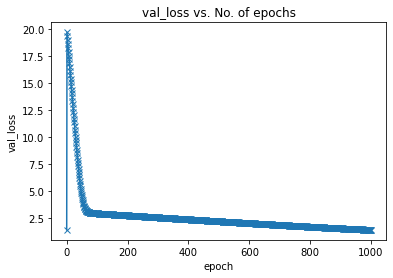

In [21]:
plt.title('val_loss vs. No. of epochs');
loss_mat = [res['val_loss'] for res in [result] + history5]
plt.plot(loss_mat, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')

val_loss = loss_mat[-1]

In [22]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)
    prediction = predictions[0].detach()
    print('Input:', input)
    print('Target:', target)
    print('Prediction', prediction)

In [23]:
input, target = val_ds[150]
predict_single(input, target, model)

Input: tensor([2.3000e-01, 3.6000e-02, 3.5000e+01, 1.6500e+02, 1.1300e+01])
Target: tensor([6.])
Prediction tensor([7.1358])
